## ei_runner.ipynb 
A basic script to run excitatory-inhibitory (EI) networks using the `ei_net` class imported from ei_net.py .  
By Sergio Verduzco  
December 2017

In [1]:
# importing libraries
%cd ..
from ei_net import *

/Users/sergio/projects/draculab


In [2]:
# This is the name of the file where logging will happen
#log_file = "/home/z/projects/draculab/logs/ei_net_log" + time.strftime("_%m-%d-%y.txt")
log_file = "./logs/ei_net_log" + time.strftime("_%m-%d-%y.txt")

In [ ]:
%%capture capt 
# logging draculab version used for this session
print('#======================================================')
print('#             | Latest git commit: |')
print('#====================================================== \n#', end=' ')
!git log -1 --oneline --color=never

In [ ]:
# Write the output of the cell above in the simulation log
f = open(log_file, mode='a')
f.write(capt.stdout)
f.close()

In [2]:
# Setting parameters
ei_runner = ei_net()
#----------------------------------
ei_runner.annotate("Adjusting size of e,i groups.")
ei_runner.set_param('e_geom', 'rows', 16)
ei_runner.set_param('e_geom', 'columns', 16)
ei_runner.set_param('i_geom', 'rows', 8)
ei_runner.set_param('i_geom', 'columns', 8)
ei_runner.annotate("Compensating for the ratio of excitatory to inhibitory units.")
ei_runner.set_param('ee_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
ei_runner.set_param('ei_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
ei_runner.set_param('ie_conn', 'weights',{'uniform' : {'low': -1.2, 'high' : -0.01}})
ei_runner.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})
#----------------------------------
ei_runner.annotate("Setting input parameters")
ei_runner.set_param('x_geom', 'rows', 5) 
ei_runner.set_param('x_geom', 'columns', 5) 
ei_runner.set_param('xe_conn', 'weights', {'uniform' : {'low': 0.01, 'high' : 5.}})
ei_runner.set_param('xi_conn', 'weights', {'uniform' : {'low': 0.01, 'high' : 0.1}})
#----------------------------------
"""
ei_runner.annotate('Using exp_rate_dist ee synapses.')
ei_runner.set_param('ee_syn', 'type', synapse_types.exp_rate_dist)
ei_runner.set_param('ee_syn', 'lrate', 1.)
ei_runner.set_param('ee_syn', 'wshift', 10.)
ei_runner.set_param('ee_syn', 'c', 2.)
"""
#----------------------------------
"""
ei_runner.annotate("Using exp_dist_sig units for the excitatory population.")
ei_runner.set_param('e_pars', 'type', unit_types.exp_dist_sig)
ei_runner.set_param('e_pars', 'tau_scale', 0.02)
ei_runner.set_param('e_pars', 'c', 3.)
ei_runner.set_param('e_pars', 'Kp', .05)

ei_runner.annotate("Using exp_dist_sig units for the inhibitory population.")
ei_runner.set_param('i_pars', 'type', unit_types.exp_dist_sig)
ei_runner.set_param('i_pars', 'tau_scale', 0.02)
ei_runner.set_param('i_pars', 'c', 3.)
ei_runner.set_param('i_pars', 'Kp', .05)
"""
#----------------------------------

ei_runner.annotate("Using exp_dist_sig_thr units for the excitatory population.")
ei_runner.set_param('e_pars', 'type', unit_types.exp_dist_sig_thr)
ei_runner.set_param('e_pars', 'tau_thr', 0.005)
ei_runner.set_param('e_pars', 'c', 3.)

ei_runner.annotate("Using exp_dist_sig_thr units for the inhibitory population.")
ei_runner.set_param('i_pars', 'type', unit_types.exp_dist_sig_thr)
ei_runner.set_param('i_pars', 'tau_thr', 0.001)
ei_runner.set_param('i_pars', 'c', 3.)

#----------------------------------
ei_runner.set_param('n', 'w_track', 16)
#----------------------------------
ei_runner.build()

In [3]:
# Creating input patterns
n_pat = 4  # number of input patterns
pat_arr = np.zeros((4, 25)) # ei_runner.n['x'])) # array with all input patterns

for row in range(5):
    for col in range(5):
        idx = 5*col + row
        if row == col or row+col == 4: # The X input pattern
            pat_arr[0,idx] = 1
        if row == 2 or col == 2:  # The + input pattern
            pat_arr[1,idx] = 1
        if row == 1 or row == 3:  # The = input pattern
            pat_arr[2,idx] = 1
        if col == 1 or col == 3:  # The || input pattern
            pat_arr[3,idx] = 1
pat_arr = pat_arr / 5.

def inp_pat(pres, rows, columns, random=True):
    # The function that creates the input pattern shown at each presentation in ei_net.run
    if random:
        idx = np.random.randint(4)
    else:
        idx = pres % 4
    return pat_arr[idx, :]
#for i in range(6):
#    print(np.reshape(inp_pat(5, 4, 2),(5,5)))

In [4]:
# Simulating
n_pres = 4
pres_time = 1.
ei_runner.run(n_pres, pres_time, set_inp_pat=inp_pat)

Presentation 0 lasted 80.12346601486206 seconds.
Presentation 1 lasted 76.86860084533691 seconds.
Presentation 2 lasted 74.73250484466553 seconds.
Presentation 3 lasted 76.5344398021698 seconds.
Execution time is 308.2637519836426 seconds


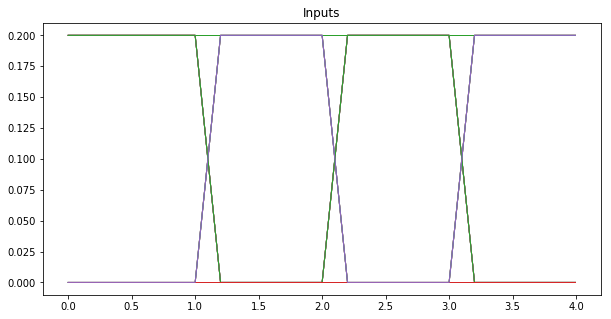

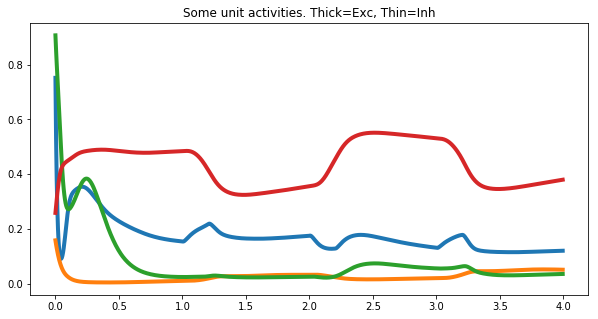

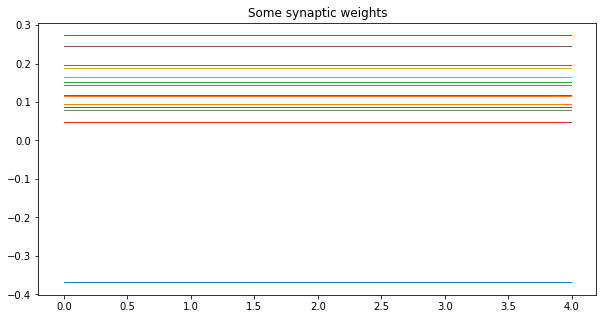

In [26]:
%matplotlib inline
ei_runner.basic_plot()

In [8]:
ei_runner.double_anim(ei_runner.e, slider=False, interv=20, nbins=20, thr=0.9, pdf=True)

[137 234 136 153 252 181   2   3 166  16]


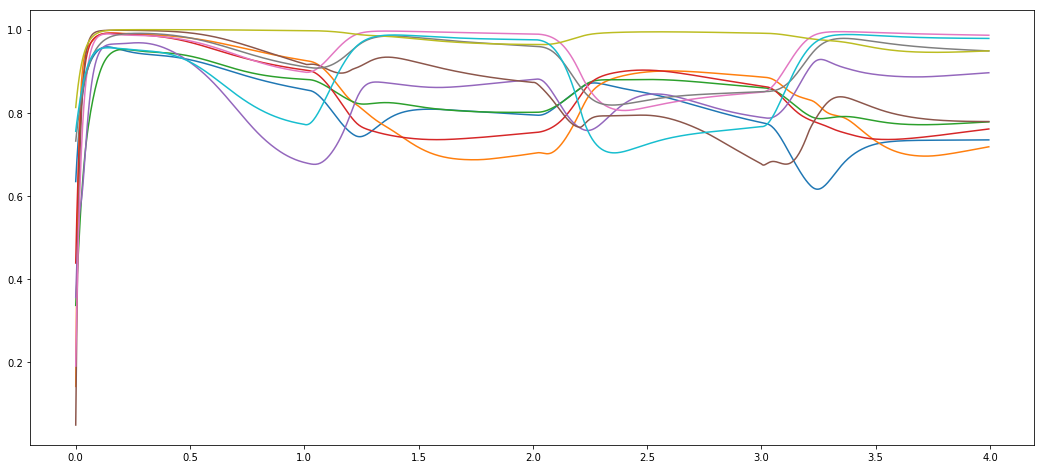

In [25]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 10  # how many units to plot
top_pop = np.array(ei_runner.e)  # population to visualize
top_units = ei_runner.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_runner.all_activs[top_pop[top_units]].transpose()
plt.plot(ei_runner.all_times, top_acts)
plt.show()

[ 82   0 251 250 249 246 244 243   8 240 239  11 238  13 224 221 214  17
 211  19 206 205  22 203  24 194 188 186 183  29  30 180  32 177 176 175
  36 174 162  39 157  41  42 155  44  45 151 150 149  49 142 141  52 140
 134  55 130  57   1 125  60 123 118 117 114  65  66 111 105 104 103 101
  72 100  99  75  92  77  78  86  80  83 255 109 235  85 212 198 197 172
  90 160  76 158 139 135 116  14 199]


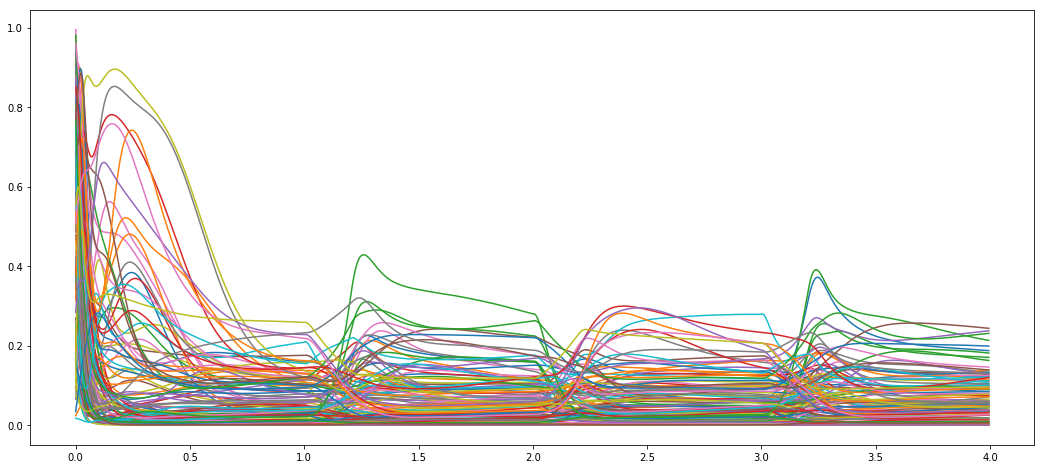

In [11]:
# Plot the lowest excitatory unit activities
n_bottom = 60  # how many units to plot
bottom_pop = np.array(ei_runner.e)  # population to visualize
bottom_units = ei_runner.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_runner.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(ei_runner.all_times, bottom_acts)
plt.show()

In [ ]:
ei_runner.history

In [ ]:
ei_runner.conn_anim(ei_runner.i, ei_runner.e, slider=True, weights=True)

In [ ]:
ei_runner.act_anim(ei_runner.e, 0.9, interv=20, slider=True)

In [ ]:
ei_runner.hist_anim(ei_runner.e, slider=True, nbins=20, pdf=True)

In [ ]:
# Some code to visualize the shape of the learning rule
f = lambda x: np.log( x/(1.-x) )
x = np.linspace(0.005, 0.99, 200)
#plt.plot(x, f(x))
y = np.linspace(0.005, 0.99, 200)
x,y = np.meshgrid(x,y)
k = np.exp(1.)/(1. - np.exp(-1))
#z = 0.1*f(x)*np.exp(y)/(y*(y-1))
z =  k * x * np.exp(y)/(144.*y*(1.-y))
%matplotlib qt5
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, rcount=60, ccount=60, antialiased=False)
ax.set_xlabel('post rate')
ax.set_ylabel('pre rate')
ax.set_zlabel('ss weight')
plt.show()